In [3]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.3/1.3 MB 3.0 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [7]:
df=pd.read_csv(r"D:\Self\Data Science\Association Rules\Assignment\book.csv")

In [8]:
df.head

<bound method NDFrame.head of       ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1          

In [12]:
df.shape

(2000, 11)

## Apriori Algorithm

In [13]:
frequent_itemsets_ap=apriori(df, min_support=0.1)

C:\Users\aasim\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [14]:
print(len(frequent_itemsets_ap))

39


In [20]:
frequent_itemsets_ap = apriori(df, min_support=0.1, use_colnames=True, verbose=1)
print(frequent_itemsets_ap.head)

Processing 44 combinations | Sampling itemset size 4
<bound method NDFrame.head of     support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (ChildBks, DoItYBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (GeogBks, ChildBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (GeogBks, YouthBks)
19   0.1875            (CookBks, DoItYBks)
20   0.1525   

C:\Users\aasim\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [22]:
frequent_itemsets_ap.sort_values("support",ascending = False)

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
10,0.2560,"(ChildBks, CookBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
14,0.1950,"(GeogBks, ChildBks)"
22,0.1925,"(GeogBks, CookBks)"


In [24]:
rules_ap = association_rules(frequent_itemsets_ap, metric = "confidence", min_threshold=0.4)

In [25]:
print(rules_ap)

            antecedents         consequents  antecedent support  \
0            (YouthBks)          (ChildBks)              0.2475   
1            (ChildBks)           (CookBks)              0.4230   
2             (CookBks)          (ChildBks)              0.4310   
3            (ChildBks)          (DoItYBks)              0.4230   
4            (DoItYBks)          (ChildBks)              0.2820   
..                  ...                 ...                 ...   
65  (CookBks, DoItYBks)           (GeogBks)              0.1875   
66   (GeogBks, CookBks)            (ArtBks)              0.1925   
67    (GeogBks, ArtBks)           (CookBks)              0.1275   
68    (CookBks, ArtBks)           (GeogBks)              0.1670   
69             (ArtBks)  (GeogBks, CookBks)              0.2410   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.4310   0.2560    0.60

In [27]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence",ascending = False).shape

(70, 9)

In [36]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,1hs_items,antecedents_,consequents_,lhs items
57,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2,"ChildBks,ArtBks",GeogBks,2
60,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2,"CookBks,DoItYBks",ArtBks,2
68,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2,"CookBks,ArtBks",GeogBks,2
66,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2,"GeogBks,CookBks",ArtBks,2
40,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2,"ChildBks,CookBks",RefBks,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

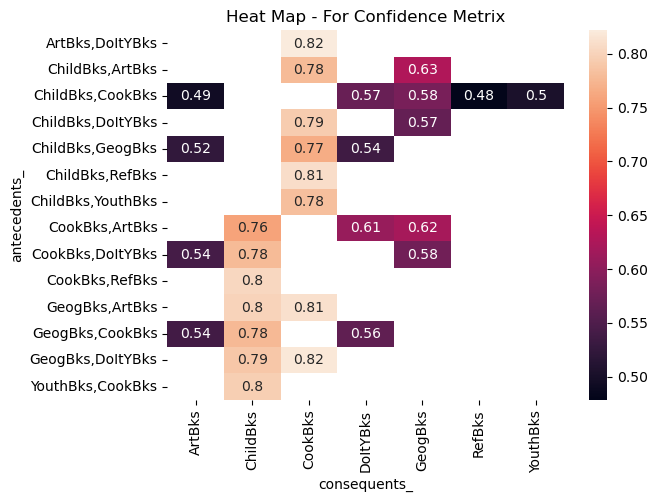

In [37]:
rules_ap['antecedents_'] = rules_ap['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap['consequents_'] = rules_ap['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_ap[rules_ap['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [38]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.6)
print(rules_ap_li.shape)

(100, 9)


In [39]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
52,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

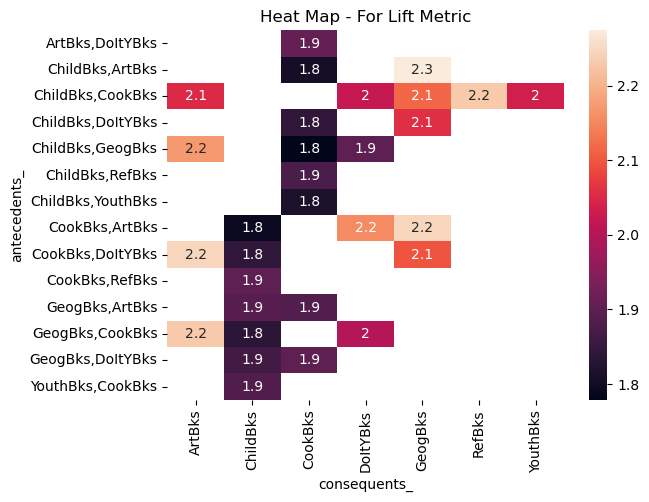

In [40]:
# Replace frozen sets with strings
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

## FpGrowth Algorithm

In [42]:
frequent_itemsets_fp=fpgrowth(df, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

9 itemset(s) from tree conditioned on items ()
2 itemset(s) from tree conditioned on items (DoItYBks)
1 itemset(s) from tree conditioned on items (DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (DoItYBks, CookBks)
3 itemset(s) from tree conditioned on items (GeogBks)
2 itemset(s) from tree conditioned on items (GeogBks, DoItYBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, CookBks)
0 itemset(s) from tree conditioned on items (GeogBks, DoItYBks, ChildBks)
0 itemset(s) from tree conditioned on items (GeogBks, ChildBks)
1 itemset(s) from tree conditioned on items (GeogBks, CookBks)
4 itemset(s) from tree conditioned on items (YouthBks)
0 itemset(s) from tree conditioned on items (YouthBks, GeogBks)
0 itemset(s) from tree conditioned on items (YouthBks, DoItYBks)
0 itemset(s) from tree conditioned on items (YouthBks, ChildBks)
1 itemset(s) from tree conditioned on items (YouthBks, CookBks)
1 itemset(s) from tree conditioned on items (ChildBks)
0 itemset

C:\Users\aasim\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [43]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
4,0.431,(CookBks)
3,0.423,(ChildBks)
0,0.282,(DoItYBks)
1,0.276,(GeogBks)
23,0.256,"(ChildBks, CookBks)"


In [44]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print(rules_fp.shape)

(49, 9)


In [45]:
rules_fp[(rules_fp.support > 0.15) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
6,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
27,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
7,(GeogBks),(CookBks),0.2760,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [46]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
47,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.276,0.1020,0.627692,2.274247,0.057150,1.944628,2
40,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.241,0.1015,0.541333,2.246196,0.056313,1.654797,2
44,"(CookBks, ArtBks)",(GeogBks),0.1670,0.276,0.1035,0.619760,2.245509,0.057408,1.904063,2
42,"(GeogBks, CookBks)",(ArtBks),0.1925,0.241,0.1035,0.537662,2.230964,0.057107,1.641657,2
45,"(ChildBks, GeogBks)",(ArtBks),0.1950,0.241,0.1020,0.523077,2.170444,0.055005,1.591452,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'YouthBks')])

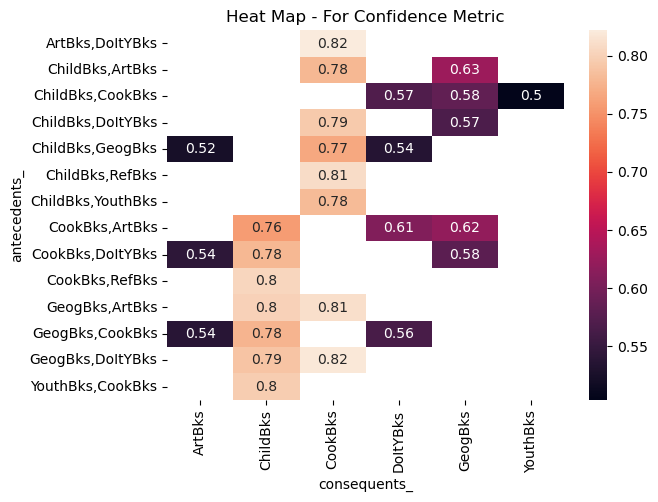

In [47]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [48]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.6)
print(rules_fp_li.shape)

(100, 9)


In [49]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
94,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
81,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
88,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
86,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
58,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ArtBks'),
  Text(1.5, 0, 'ChildBks'),
  Text(2.5, 0, 'CookBks'),
  Text(3.5, 0, 'DoItYBks'),
  Text(4.5, 0, 'GeogBks'),
  Text(5.5, 0, 'RefBks'),
  Text(6.5, 0, 'YouthBks')])

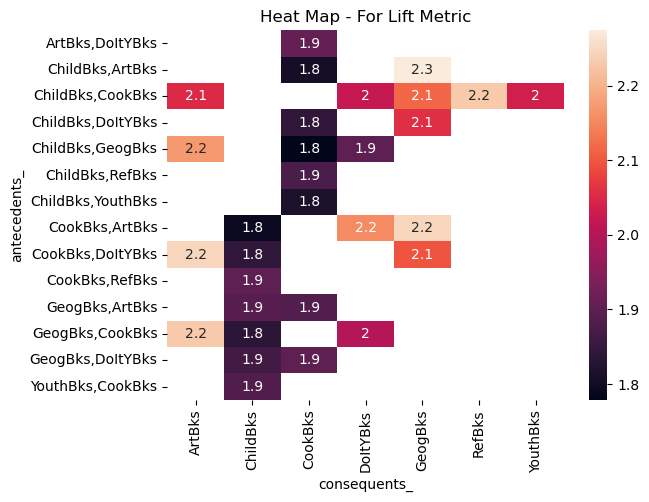

In [50]:
# Replace frozen sets with strings
rules_fp_li['antecedents_'] = rules_fp_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp_li['consequents_'] = rules_fp_li['consequents'].apply(lambda a: ','.join(list(a)))
# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_fp_li[rules_fp_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')
# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)